The analysis in [Bayes confidence]({{ site.baseurl
}}/chapters/10/bayes_confidence) found that we could estimate the probability
of a range of population means, given a sample mean.

This can be very useful.  In the case of the Havana mathematics marks, it
allows you, the minister of education, to make a confident statement about the
range of the eventual mean mark for the exams in 2019, when you currently only
have a sample of 50 fast-track marks.

The problem was that, to simplify the problem, we had to assume that we knew
the *sampling distribution of the mean* for a sample of 50 marks.  Lacking
anything better, we estimated this distribution using the marks from 2018.  But
--- this was an unhappy compromise, because we know that the sampling
distribution of the mean depends on the overall distribution of marks, and this
might well be different in 2019 than it was in 2018.

The question in this page is --- how can we get an estimate of the sampling
distribution, *from the sample itself*?

This is the job of the strange but beautiful [bootstrap
technique](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))

We start by loading the sample of 50 marks from 2019.

In [1]:
import numpy as np
# Clean up display of small numbers.  Doesn't affect calculations.
np.set_printoptions(precision=4, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

You can download the sample file from [havana_math_2019_sample.csv]({{
site.baseurl }}/data/havana_math_2019_sample.csv).

In [2]:
havana_2019_sample = pd.read_csv('havana_math_2019_sample.csv')['mark']
observed_sample_mean = np.mean(havana_2019_sample)
observed_sample_mean

58.74

We have the mean from this sample, but of course the sample also has a
distribution:

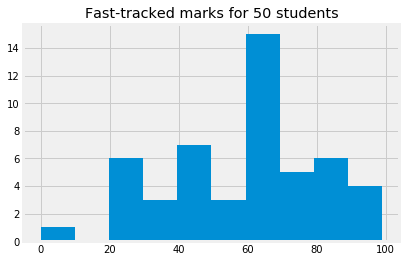

In [3]:
plt.hist(havana_2019_sample)
plt.title('Fast-tracked marks for 50 students');

We found in [Bayes confidence]({{ site.baseurl
}}/chapters/10/bayes_confidence) that we needed the sampling distribution of
the mean, in order to find our confidence threshold.

Of course, what we would like to do, is to draw lots of new samples of size 50
from this population of the 2019 marks, to estimate the sampling distribution,
as we did for the 2018 distribution in the previous page.  But - we only have
this sample. What can we learn about the sampling distribution of the mean,
from this sample of 50 marks?

The weird trick of the bootstrap is to *sample from the sample*.  Call our
sample of 50 marks above: *the original sample*.  We are going to take new
samples of 50 marks *from the original sample*.  Call these *bootstrap
samples*.  The bootstrap samples will be something like the samples we would
get if we had taken samples of 50 from the whole population.  We can use the
spread of the bootstrap samples to give us a "bootstrap" estimate of the
real sampling distribution, as if we had taken actual new samples from the
population.

How do we take a new sample of 50 from the original sample of 50?   Clearly, we
cannot sample *without replacement*, because any new sample is going to be the
same as the original sample, but in a different order, and the order isn't
important to us here.

What we